In [2]:
import pathlib
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt


import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import statsmodels.formula.api as smf

import SessionTools.two_photon as st2p
import NeuromodPlasticity as nmp

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [3]:
# load dual imaging sessions
basedir = pathlib.Path('/media/mplitt/SSD_storage/2P_scratch/R18B05LexA_jGCaMP8s_R60D05Gal4_jRGECO1a')
sess_df = pd.read_csv(basedir / 'sessions.csv')
sess_df = sess_df.loc[sess_df['usable']==1]
sess_df['fly_id'] = [row['date']+'_'+row['fly']  for _, row in sess_df.iterrows()]

In [4]:
def load_row(row):
    outdir = pathlib.PurePath( basedir / row['date'] / row['fly'] / row['session'] / 'preprocess.pkl')
    return st2p.preprocessing.EBImagingSession.from_file(outdir)

In [33]:
stats_df = nmp.dual_imaging.offset_stats(sess_df,load_row)
stats_df_unique = nmp.dual_imaging.offset_stats_unique(stats_df)    
stats_df_unique


,fly_id,cl,offset_ch1,offset_ch2,offset_var_ch1,offset_var_ch2,offset_diff,abs_offset_diff,pva_diff,fwhm_ch1,fwhm_ch2
0,13_01_2025_fly4,1,0.550375,1.274900,0.849358,0.850665,0.036643,0.345749,0.388719,1.178097,1.178097
1,13_01_2025_fly4,0,5.824313,6.124936,0.825863,0.848774,6.276977,0.461133,0.510967,1.178097,1.178097
2,14_01_2025_fly1,1,2.033847,2.095309,0.678918,0.772624,-0.001675,0.693587,0.777335,0.785398,0.785398
3,14_01_2025_fly1,0,5.342582,6.071058,0.887927,0.871866,0.073606,0.758157,0.849352,0.392699,0.392699
4,14_01_2025_fly2,1,3.862789,4.159786,0.858384,0.882421,0.098075,0.935173,1.006870,0.785398,0.392699
5,14_01_2025_fly2,0,2.739796,3.056085,0.918239,0.980796,6.172448,1.315271,1.358625,0.392699,0.392699
6,15_01_2025_fly1,1,3.103175,3.022125,0.688791,0.758120,-0.072619,0.520748,0.584322,1.178097,1.178097
7,15_01_2025_fly1,0,2.598768,2.470424,0.776944,0.788404,6.227437,0.344926,0.385949,1.178097,1.178097
8,15_01_2025_fly2,1,5.621496,5.637567,0.639082,0.753531,-0.061466,0.651746,0.726918,1.178097,0.392699
9,15_01_2025_fly2,0,1.025951,0.867144,0.975067,0.961566,6.212530,0.521237,0.590316,1.178097,1.178097


closed loop difference from red fwhm: t=0.0,p=0.000244140625
closed loop difference from green fwhm: t=0.0,p=0.000244140625
dark difference from red fwhm: t=2.0,p=0.000732421875
dark difference from green fwhm: t=2.0,p=0.000732421875


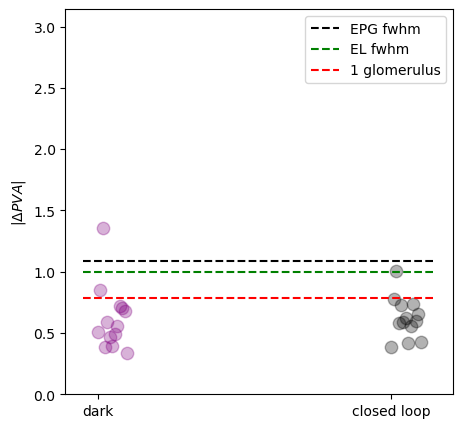

In [38]:
fig, ax = plt.subplots(1,1,figsize=[5,5])
mask = stats_df_unique['cl']==1


k = 'pva_diff'
ax.scatter(np.linspace(0,.1,num=mask.sum())+1, stats_df_unique.loc[mask, k], color='k', alpha=.3, s=80)

ax.scatter(np.linspace(0,.1,num=(~mask).sum()), stats_df_unique.loc[~mask, k], color='purple', alpha=.3, s=80)


fwhm_ch1 = stats_df_unique.loc[mask,'fwhm_ch1'].mean()
fwhm_ch2 = stats_df_unique.loc[mask,'fwhm_ch2'].mean()
# ax.plot([-.05,1.15], np.pi/2*np.ones((2,)), 'k--') # chance
ax.plot([-.05,1.15], fwhm_ch1*np.ones((2,)), color = 'k', linestyle='--', label='EPG fwhm') # ch1 bump width
ax.plot([-.05,1.15], fwhm_ch2*np.ones((2,)), color = 'green', linestyle='--', label='EL fwhm') # ch1 bump width
ax.plot([-.05,1.15], np.pi/4*np.ones((2,)), color = 'red', linestyle='--', label='1 glomerulus') # ch1 bump width
# ax.plot([-.05,1.15],  fwhm1, 'purple--') # chance
ax.set_ylim([0,np.pi])
ax.set_xticks([0,1], labels=['dark', 'closed loop'])
ax.set_ylabel(r'$| \Delta PVA |$')
ax.legend()

t, p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-fwhm_ch1)
print(f"closed loop difference from red fwhm: t={t},p={p}")
t, p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-fwhm_ch1)
print(f"closed loop difference from green fwhm: t={t},p={p}")
t,p = sp.stats.wilcoxon(stats_df_unique.loc[mask, k]-np.pi/2)


t, p = sp.stats.wilcoxon(stats_df_unique.loc[~mask, k]-fwhm_ch1)
print(f"dark difference from red fwhm: t={t},p={p}")
t, p = sp.stats.wilcoxon(stats_df_unique.loc[~mask, k]-fwhm_ch1)
print(f"dark difference from green fwhm: t={t},p={p}")

In [ ]:
# measure phase offset 

# measure average bump width in fwhm
# test if phase difference is less than bump width

In [2]:
# PV amplitude vs rotational veloctiy

In [3]:
# dPVA vs rotational velocity


In [ ]:
# all imaging sesions

# heatmaps
# histogram of differences in dark vs closed loop

